In [4]:
import os
from os import path as op
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
import vlgp
from vlgp import util, simulation

In [6]:
# Set dimensions and simulation parameters
K1 = 500  # Number of observations for Group 1
K2 = 800  # Number of observations for Group 2
K = K1 + K2  # Total number of observations
D = 6  # Total latent dimensions
T = 250  # Number of time points
t = np.linspace(0, 2, T)  # Time intervals

d_s = 2  # Shared latent dimension
d_1 = 2  # Independent latent dimension for group 1
d_2 = 2  # Independent latent dimension for group 2

rho = 1.0  # Scale for GP kernel
l = 2.0  # Length scale for GP kernel
nu = 0.1  # Noise variance for observations

# Set factor loadings
A_1 = np.random.randn(K1, d_1)
A_2 = np.random.randn(K2, d_2)
A_s1 = np.random.randn(K1, d_s)
A_s2 = np.random.randn(K2, d_s)

A = np.block([[A_s1, A_1, np.zeros((K1, d_2))],
              [A_s2, np.zeros((K2, d_1)), A_2]])  # Group 2

def kernel_function(t1, t2, rho, l):
    """Squared exponential kernel."""
    dist_sq = cdist(t1.reshape(-1, 1), t2.reshape(-1, 1), metric='sqeuclidean')
    return rho * np.exp(-dist_sq / (2 * l ** 2))

K_t = kernel_function(t, t, rho, l)

z_shared = np.random.multivariate_normal(np.zeros(T), K_t, size=d_s).T
z_1 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_1).T
z_2 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_2).T

Z = np.hstack([z_shared, z_1, z_2])
Z

array([[-1.90713857, -0.21110363,  0.88700264,  1.39618456, -1.05174979,
        -0.62878955],
       [-1.90266802, -0.21379692,  0.88793464,  1.39139159, -1.05594364,
        -0.63279601],
       [-1.89817622, -0.21651524,  0.8888339 ,  1.38660134, -1.06013018,
        -0.63681511],
       ...,
       [-0.99365396, -0.93249004,  0.25795656,  0.3025963 , -1.25798267,
        -1.76835359],
       [-0.99262159, -0.93379031,  0.25329683,  0.29757726, -1.25590481,
        -1.7727239 ],
       [-0.9916101 , -0.93507455,  0.24863646,  0.29254957, -1.25382724,
        -1.77708264]])

In [7]:
ntrial = 10  # Number of trials
nbin = 250  # Number of bins per trial to match T=250 as previously set
dim = 6  # Number latent dimensions
Z_cut = Z[:(Z.shape[0] // nbin) * nbin]
trials = [{'ID': i, 'y': Z_cut[i * nbin: (i + 1) * nbin].reshape(nbin, dim)} for i in range(Z_cut.shape[0] // nbin)]
trials

[{'ID': 0,
  'y': array([[-1.90713857, -0.21110363,  0.88700264,  1.39618456, -1.05174979,
          -0.62878955],
         [-1.90266802, -0.21379692,  0.88793464,  1.39139159, -1.05594364,
          -0.63279601],
         [-1.89817622, -0.21651524,  0.8888339 ,  1.38660134, -1.06013018,
          -0.63681511],
         ...,
         [-0.99365396, -0.93249004,  0.25795656,  0.3025963 , -1.25798267,
          -1.76835359],
         [-0.99262159, -0.93379031,  0.25329683,  0.29757726, -1.25590481,
          -1.7727239 ],
         [-0.9916101 , -0.93507455,  0.24863646,  0.29254957, -1.25382724,
          -1.77708264]])}]

In [16]:
#np.random.seed(0)

fit = vlgp.fit(
    trials,  
    n_factors=3,  # dimensionality of latent process
)

Initializing
Initialized
Fitting
Iteration    1, E-step 0.11s, M-step 0.03s
Iteration    2, E-step 0.12s, M-step 0.03s
Iteration    3, E-step 0.13s, M-step 0.03s
Iteration    4, E-step 0.12s, M-step 0.03s
Iteration    5, E-step 0.11s, M-step 0.04s
Iteration    6, E-step 0.13s, M-step 0.03s
Iteration    7, E-step 0.12s, M-step 0.04s
Iteration    8, E-step 0.11s, M-step 0.03s
Iteration    9, E-step 0.13s, M-step 0.03s
Iteration   10, E-step 0.12s, M-step 0.03s
Iteration   11, E-step 0.11s, M-step 0.03s
Iteration   12, E-step 0.11s, M-step 0.03s
Iteration   13, E-step 0.11s, M-step 0.03s
Iteration   14, E-step 0.11s, M-step 0.03s
Iteration   15, E-step 0.12s, M-step 0.03s
Iteration   16, E-step 0.12s, M-step 0.03s
Iteration   17, E-step 0.12s, M-step 0.03s
Iteration   18, E-step 0.12s, M-step 0.03s
Iteration   19, E-step 0.12s, M-step 0.03s
Iteration   20, E-step 0.12s, M-step 0.03s
Inferring
0.11s
Done


In [17]:
fit

{'trials': [{'ID': 0,
   'y': array([[-1.90713857, -0.21110363,  0.88700264,  1.39618456, -1.05174979,
           -0.62878955],
          [-1.90266802, -0.21379692,  0.88793464,  1.39139159, -1.05594364,
           -0.63279601],
          [-1.89817622, -0.21651524,  0.8888339 ,  1.38660134, -1.06013018,
           -0.63681511],
          ...,
          [-0.99365396, -0.93249004,  0.25795656,  0.3025963 , -1.25798267,
           -1.76835359],
          [-0.99262159, -0.93379031,  0.25329683,  0.29757726, -1.25590481,
           -1.7727239 ],
          [-0.9916101 , -0.93507455,  0.24863646,  0.29254957, -1.25382724,
           -1.77708264]]),
   'mu': array([[-3.67410760e+96, -1.53963953e+94, -4.43879201e+93],
          [-4.19125780e+96, -1.66545384e+94, -4.86054612e+93],
          [-4.68754230e+96, -3.78392320e+94, -5.27637426e+93],
          [-5.15059804e+96, -8.39994790e+94, -5.68233957e+93],
          [-5.57073937e+96, -1.26619663e+95, -6.07479943e+93],
          [-5.94151823e+96, -

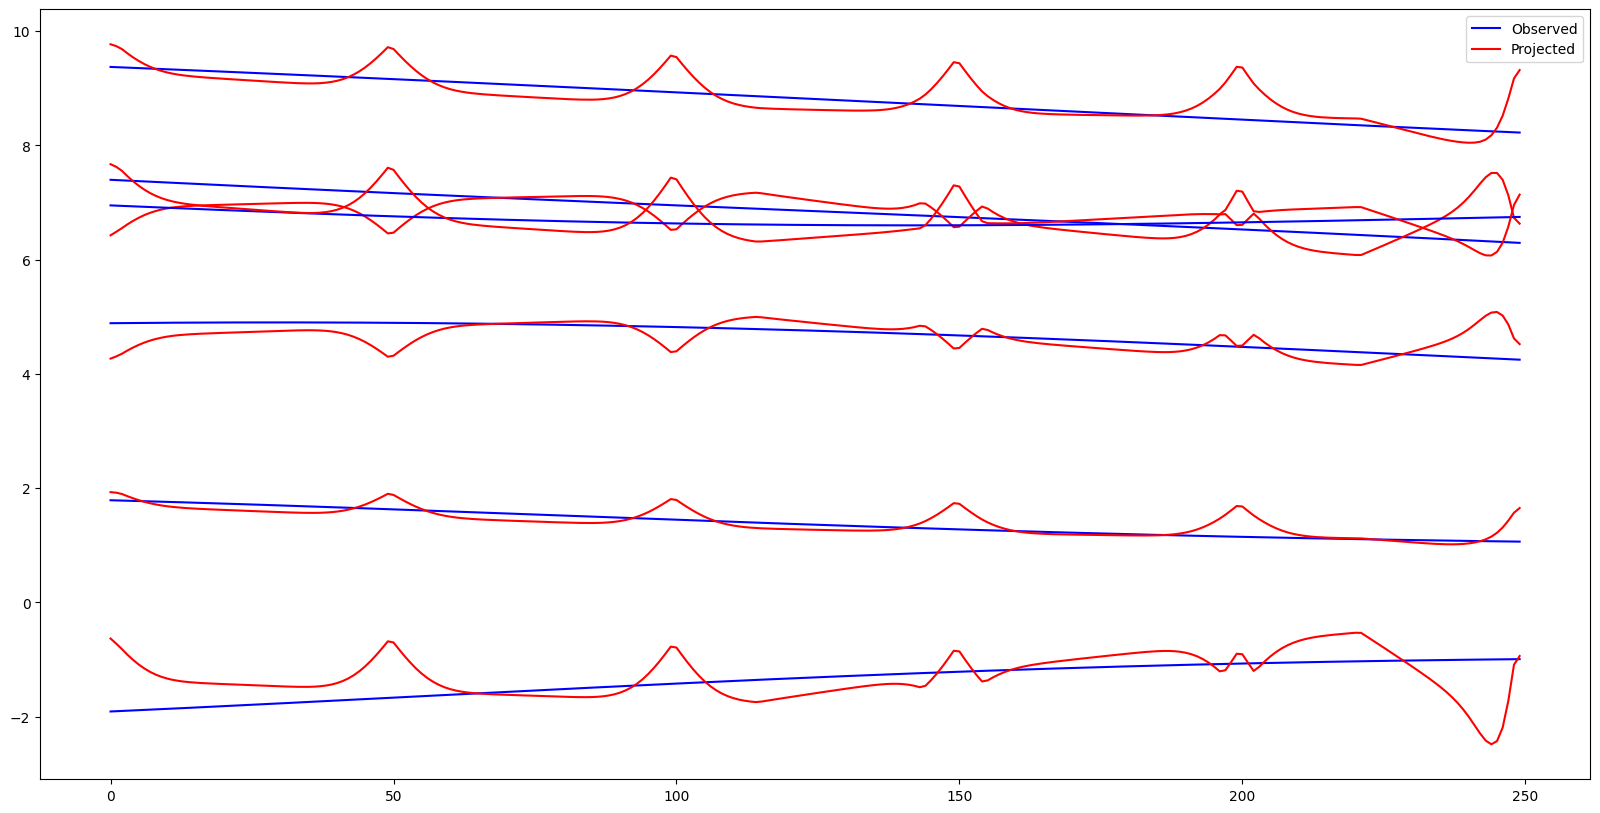

In [18]:
trials = fit['trials']  # extract trials
for i in range(len(trials)):
    trial = trials[i]
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W 
    
    # Plotting
    plt.figure(figsize=(20, 10))
    for j in range(x.shape[1]):
        offset = 2 * j
        plt.plot(x[:, j] + offset, 'b', label='Observed' if j == 0 else "")
        plt.plot(mu_proj[:, j] + offset, 'r', label='Projected' if j == 0 else "")
    plt.legend()
    plt.show()
    plt.close()


In [19]:
trials = fit['trials']  # extract trials
rmses = [] 

for i, trial in enumerate(trials):
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W  
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((x - mu_proj) ** 2))
    rmses.append(rmse)

rmses

[0.29147514987872136]

In [20]:
# Correlation Coefficients
def calculate_correlation(cor, pred):
    correlation_matrix = np.corrcoef(cor.T, pred.T)
    num_variables = cor.shape[1]
    return np.diag(correlation_matrix[num_variables:, :num_variables])

correlations = [calculate_correlation(trial['y'], mu @ W) for trial in trials]
correlations


[array([0.22951434, 0.77332467, 0.44598375, 0.43553503, 0.4632387 ,
        0.73222702])]

In [24]:
# Z Z.transpose

In [25]:
# ask how important it is to use this model
# check how well it really does and if its worth it
# look at reconstruction error (rmse) and prediction error
# cross validated likelihood
# r squared and correlation (might be weird)
# eval model if using gauss isntead of poiss
# was gp even worth doing
# ask and explore answer to these questions
# how much of an improvement does each part of the model make to the complete model
# make sure to make fair comparisons (same latents, same vars, etc)
# benchmarking the model and justifying its use